In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
 
# Create Snowball stemmer
snow_stemmer = SnowballStemmer(language='english')

# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()

# Create a Lancaster Stemmer instance
lancaster_stemmer = LancasterStemmer()

# Example words for stemming
words = ["running", "jumps", "happily", "programming", 'cared','fairly','sportingly']

# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]
print("===Porter===:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Snowball===:")
stemmed_words = [snow_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Lancaster===:")
stemmed_words = [lancaster_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

===Porter===:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fairli', 'sportingli']

===Snowball===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fair', 'sport']

===Lancaster===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happy', 'program', 'car', 'fair', 'sport']


Task 0 

In [3]:
import nltk
from nltk.book import gutenberg
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


===Частотний розподіл оригінальних слів===
to: 5239
the: 5201
and: 4896
of: 4291
i: 3178
a: 3129
it: 2528
her: 2469
was: 2398
she: 2340
in: 2188
not: 2140
you: 1980
be: 1975
that: 1806
he: 1806
had: 1624
but: 1441
as: 1436
for: 1347

===Частотний розподіл стемованих слів===
to: 5239
the: 5201
and: 4896
of: 4291
i: 3178
a: 3129
it: 2650
her: 2489
wa: 2398
she: 2340
be: 2336
in: 2188
not: 2140
you: 1980
mr: 1852
that: 1806
he: 1806
had: 1624
have: 1467
but: 1441


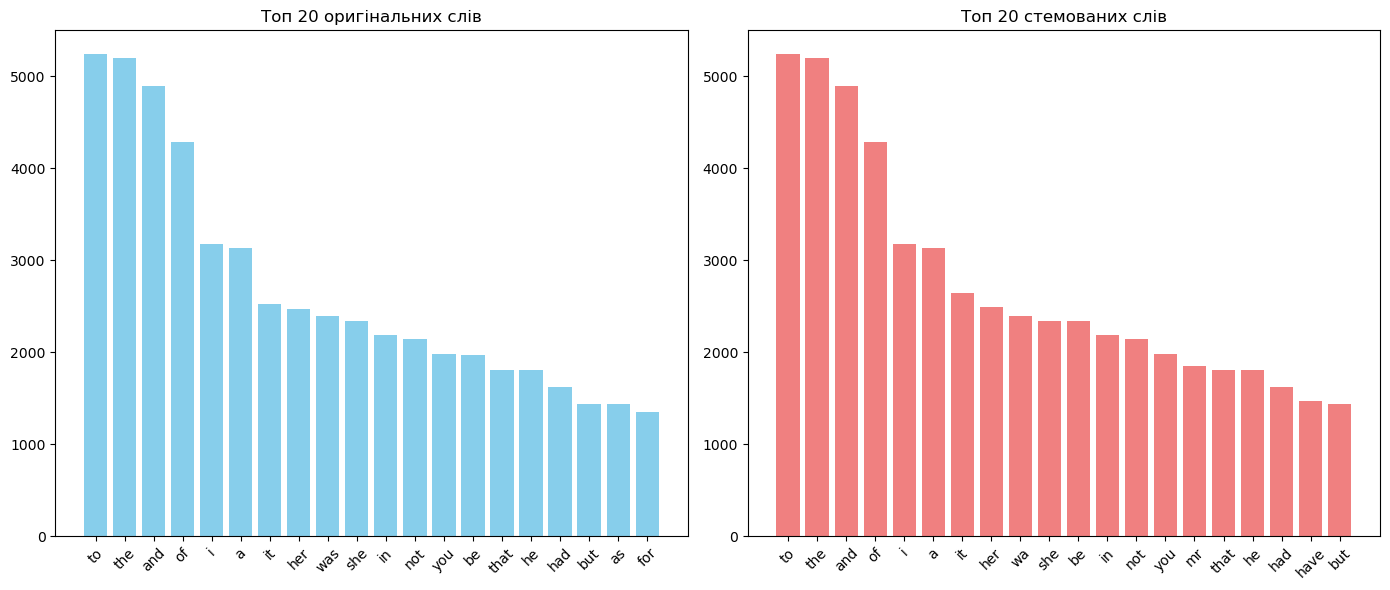

In [1]:
#завантажуємо текст для аналізу
nltk.download('gutenberg')
text7 = gutenberg.words('austen-emma.txt')

#створюємо об'єкт PorterStemmer для стемінгу
porter_stemmer = PorterStemmer()

#фільтруємо лише алфавітні слова та перетворюємо їх на малі літери
words = [word.lower() for word in text7 if word.isalpha()]

#обчислюємо частоти для оригінальних слів
fdist_original = FreqDist(words)

# стемінгуємо слова і обчислюємо частоти для стемованих слів
stemmed_words = [porter_stemmer.stem(word) for word in words]
fdist_stemmed = FreqDist(stemmed_words)

# 20 найпоширеніших слів з кожного списку
top_original = fdist_original.most_common(20)
top_stemmed = fdist_stemmed.most_common(20)

print("===Частотний розподіл оригінальних слів===")
for word, freq in top_original:
    print(f"{word}: {freq}")

print("\n===Частотний розподіл стемованих слів===")
for word, freq in top_stemmed:
    print(f"{word}: {freq}")

plt.figure(figsize=(14, 6))

#графік для оригінальних слів
plt.subplot(1, 2, 1)
plt.bar([word for word, freq in top_original],
        [freq for word, freq in top_original], color='skyblue')
plt.title('Топ 20 оригінальних слів')
plt.xticks(rotation=45)

# графік для стемованих слів
plt.subplot(1, 2, 2)
plt.bar([word for word, freq in top_stemmed],
        [freq for word, freq in top_stemmed], color='lightcoral')
plt.title('Топ 20 стемованих слів')
plt.xticks(rotation=45)

# підлаштовуємо відступи, щоб графіки не накладалися
plt.tight_layout()
plt.show()


Task 2

In [10]:
from nltk.stem.api import StemmerI
import re

class UkrainianRegexpStemmer(StemmerI):
    def __init__(self, min_len=3):
        #список найпоширеніших суфіксів українських слів
        suffixes = [
            'енням', 'ення', 'істю', 'ість', 'ого', 'ому', 'ими', 'ій', 'их', 'ий',
            'аєш', 'ають', 'єте', 'еться', 'ються', 'ила', 'или', 'ило', 'ати', 'ити',
            'ив', 'ився', 'тись', 'тися', 'ться', 'шся', 'ою', 'ею', 'ами', 'ями',
            'ів', 'їв', 'ей', 'у', 'ю', 'а', 'е', 'є', 'и', 'і', 'о', 'я', 'ь'
        ]

        #зібрати регулярку зі списку
        self.pattern = re.compile(r'(' + '|'.join(sorted(suffixes, key=len, reverse=True)) + r')$')
        self.min_len = min_len

    def stem(self, word):
        word = word.lower()
        if len(word) < self.min_len:
            return word
        return self.pattern.sub('', word)


In [12]:
stemmer = UkrainianRegexpStemmer()

words = ['говорили', 'читатимеш', 'друкується', 'красива', 'найкращому',
    'машинами', 'студентів', 'піснею', 'дівчині', 'навчанням',
    'співати', 'з’явиться', 'роботою', 'бігти', 'світлий']
stemmed = [stemmer.stem(word) for word in words]

print("Original words:", words)
print("Stemmed words:", stemmed)


Original words: ['говорили', 'читатимеш', 'друкується', 'красива', 'найкращому', 'машинами', 'студентів', 'піснею', 'дівчині', 'навчанням', 'співати', 'з’явиться', 'роботою', 'бігти', 'світлий']
Stemmed words: ['говор', 'читатимеш', 'друкує', 'красив', 'найкращ', 'машин', 'студент', 'пісн', 'дівчин', 'навчанням', 'спів', 'з’яви', 'робот', 'бігт', 'світл']


Task 3

In [2]:
import numpy as np
from typing import Dict, Tuple, Optional, Union

#розкладка клавіатури QWERTY 
qwerty_layout: Dict[str, Tuple[int, int]] = {
    'q': (0, 0), 'w': (0, 1), 'e': (0, 2), 'r': (0, 3), 't': (0, 4), 'y': (0, 5), 'u': (0, 6), 'i': (0, 7), 'o': (0, 8), 'p': (0, 9),
    'a': (1, 0), 's': (1, 1), 'd': (1, 2), 'f': (1, 3), 'g': (1, 4), 'h': (1, 5), 'j': (1, 6), 'k': (1, 7), 'l': (1, 8),
    'z': (2, 0), 'x': (2, 1), 'c': (2, 2), 'v': (2, 3), 'b': (2, 4), 'n': (2, 5), 'm': (2, 6)
}

class WagnerFisherAlg:
    """
    Обчислює відстань Левенштейна (без операцій обміну).
    використовує евклідову відстань між клавішами для заміни;
    в іншому випадку використовується одинична вартість = 1.
    """
    def __init__(
        self,
        keyboard_layout: Optional[Dict[str, Tuple[int, int]]] = qwerty_layout,
        ins_cost: float = 1.0,
        del_cost: float = 1.0
    ):
        self.layout = keyboard_layout  # зберігаємо розкладку клавіатури
        self.ins = ins_cost  # вартість вставки
        self.del_cost = del_cost  # вартість видалення

    def _sub_cost(self, c1: str, c2: str) -> float:
        """
        Обчислює вартість заміни символів c1 і c2.
        Якщо клавіші є однаковими, повертаємо 0.
        Якщо клавіші не знайдено в розкладці, повертаємо максимальну вартість вставки або видалення.
        В іншому випадку повертаємо евклідову відстань між клавішами на клавіатурі.
        """
        if c1 == c2:
            return 0.0
        if not self.layout:
            return max(self.ins, self.del_cost)  # якщо немає розкладки, повертаємо максимальну вартість
        p1 = self.layout.get(c1.lower())  #отримуємо позицію першої клавіші
        p2 = self.layout.get(c2.lower())  #отримуємо позицію другої клавіші
        if p1 is None or p2 is None:
            return max(self.ins, self.del_cost)  # якщо клавіша не знайдена, використовуємо максимальну вартість
        return float(np.linalg.norm((p1[0]-p2[0], p1[1]-p2[1])))  # повертаємо евклідову відстань між клавішами

    def __call__(self, s1: str, s2: str) -> float:
        """
        Обчислює відстань Левенштейна між двома рядками s1 та s2.
        Використовує динамічне програмування для побудови таблиці відстаней.
        """
        m, n = len(s1), len(s2) 
        dp = np.zeros((m+1, n+1), dtype=float)  # Створення таблиці для динамічного програмування
        for i in range(1, m+1): dp[i,0] = dp[i-1,0] + self.del_cost  # видалення
        for j in range(1, n+1): dp[0,j] = dp[0,j-1] + self.ins  # вставки

        # таблиця для обчислення відстані
        for i in range(1, m+1):
            for j in range(1, n+1):
                cost_del = dp[i-1,j] + self.del_cost  # Вартість видалення
                cost_ins = dp[i,j-1] + self.ins  # Вартість вставки
                cost_sub = dp[i-1,j-1] + self._sub_cost(s1[i-1], s2[j-1])  # Вартість заміни
                dp[i,j] = min(cost_del, cost_ins, cost_sub)  # Вибір мінімальної вартості
        return float(dp[m,n])  

class DamerauLevenshteinAlg:
    """
    Обчислює відстань Дамерау-Левенштейна (Optimal String Alignment).
    Дозволяє виконувати обмін сусідніх символів з можливістю налаштування вартості операцій.
    """
    def __init__(
        self,
        keyboard_layout: Optional[Dict[str, Tuple[int, int]]] = qwerty_layout,
        ins_cost: float = 1.0,
        del_cost: float = 1.0
    ):
        self.layout = keyboard_layout  #зберігаємо розкладку клавіатури
        self.ins = ins_cost  # Вартість вставки
        self.del_cost = del_cost  # Вартість видалення

    def _sub_cost(self, c1: str, c2: str) -> float:
        """
        Використовуємо ту саму вартість заміни, що й в класі WagnerFisherAlg.
        """
        return WagnerFisherAlg(self.layout, self.ins, self.del_cost)._sub_cost(c1, c2)

    def _trans_cost(self, c1: str, c2: str) -> float:
        """
        Обчислює вартість обміну сусідніх символів.
        Якщо розкладка клавіатури надана, використовуємо евклідову відстань між клавішами.
        Якщо ні — використовуємо стандартну вартість.
        """
        if not self.layout:
            return max(self.ins, self.del_cost)  # Якщо немає розкладки, повертаємо максимальну вартість
        p1 = self.layout.get(c1.lower())  # Отримуємо позицію першої клавіші
        p2 = self.layout.get(c2.lower())  # Отримуємо позицію другої клавіші
        if p1 is None or p2 is None:
            return max(self.ins, self.del_cost)  # Якщо клавіша не знайдена, використовуємо максимальну вартість
        return float(np.linalg.norm((p1[0]-p2[0], p1[1]-p2[1])))  # Повертаємо евклідову відстань

    def __call__(self, s1: str, s2: str) -> float:
        """
        Обчислює відстань Дамерау-Левенштейна між двома рядками s1 та s2.
        Включає операцію обміну сусідніх символів, використовуючи динамічне програмування.
        """
        m, n = len(s1), len(s2)
        dp = np.zeros((m+1, n+1), dtype=float)  
        for i in range(1, m+1): dp[i,0] = dp[i-1,0] + self.del_cost  
        for j in range(1, n+1): dp[0,j] = dp[0,j-1] + self.ins  
            
        for i in range(1, m+1):
            for j in range(1, n+1):
                cost_del = dp[i-1,j] + self.del_cost  # Вартість видалення
                cost_ins = dp[i,j-1] + self.ins  # Вартість вставки
                cost_sub = dp[i-1,j-1] + self._sub_cost(s1[i-1], s2[j-1])  # Вартість заміни
                cost = min(cost_del, cost_ins, cost_sub)  # Вибір мінімальної вартості

                # Операція обміну сусідніх символів (якщо можливо)
                if i > 1 and j > 1 and s1[i-1] == s2[j-2] and s1[i-2] == s2[j-1]:
                    cost_trans = dp[i-2,j-2] + self._trans_cost(s1[i-2], s1[i-1])  # Вартість обміну
                    cost = min(cost, cost_trans)  # Вибір мінімальної вартості
                dp[i,j] = cost  # Оновлюємо таблицю відстаней
        return float(dp[m,n])  # Повертаємо результат

if __name__ == "__main__":
    wf = WagnerFisherAlg()                    # Використовуємо за замовчуванням QWERTY
    print(wf("kitten", "sitting"))         # Відстань Левенштейна
    dl = DamerauLevenshteinAlg()             # Використовуємо алгоритм Дамерау-Левенштейна
    print(dl("ca", "ac"))                   # Повинна бути мала відстань через обмін символів
    # Для однакових вартостей, передаємо keyboard_layout=None
    wf_plain = WagnerFisherAlg(keyboard_layout=None)
    print(wf_plain("kitten", "sitting"))
    dl_plain = DamerauLevenshteinAlg(keyboard_layout=None)
    print(dl_plain("ca", "ac"))


5.0
2.0
3.0
1.0
